In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [116]:
df_internet_ingresos=pd.read_csv('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/Internet_Ingresos.csv')

In [117]:
df_internet_penetracion_provincia=pd.read_csv('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/Internet_Penetracion_prov.csv')

In [118]:
df_portabilidad=pd.read_csv('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/Portabilidad.csv')

In [120]:
df_telefonia_movil_ingresos=pd.read_csv('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/Telefonia_movil_ingresos.csv')

In [123]:
#Moficacion tipo de dato df_internet_ingresos
df_internet_ingresos['Ingresos (miles de pesos)'] = df_internet_ingresos['Ingresos (miles de pesos)'].str.replace('.', '').astype('int')

In [124]:
df_internet_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     int64 
 3   Periodo                    35 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [125]:
#Moficacion tipo de dato df_internet_penetracion_provincia
df_internet_penetracion_provincia['Provincia'] = df_internet_penetracion_provincia['Provincia'].astype('str')
df_internet_penetracion_provincia['Accesos por cada 100 hogares'] = df_internet_penetracion_provincia['Accesos por cada 100 hogares'].str.replace(',', '.').astype('float')

In [126]:
df_internet_penetracion_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [127]:
#eliminar columna nextel y otros df_portabilidad
df_portabilidad.drop(['Nextel','Otros'], axis=1, inplace=True)

In [128]:
#Moficacion tipo de dato df_portabilidad
df_portabilidad['Personal'] = df_portabilidad['Personal'].astype(str).str.replace(',', '').astype('int')
df_portabilidad['Movistar'] = df_portabilidad['Movistar'].astype(str).str.replace(',', '').astype('int')
df_portabilidad['Claro'] = df_portabilidad['Claro'].astype(str).str.replace(',', '').astype('int')



In [129]:
df_portabilidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Año       128 non-null    int64 
 1   Mes       128 non-null    int64 
 2   Personal  128 non-null    int64 
 3   Claro     128 non-null    int64 
 4   Movistar  128 non-null    int64 
 5   Periodo   128 non-null    object
dtypes: int64(5), object(1)
memory usage: 6.1+ KB


In [130]:
df_portabilidad.tail()

,Año,Mes,Personal,Claro,Movistar,Periodo
123,2022,6,-3012,20311,-17348,Jun-22
124,2022,7,2263,7363,-9653,Jul-22
125,2022,8,996,19548,-20585,Aug-22
126,2022,9,-2209,18050,-15982,Sep-22
127,2022,10,-1605,987,469,Oct-22


In [132]:
df_telefonia_movil_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    39 non-null     int64 
 1   Trimestre              39 non-null     int64 
 2   Ingresos (miles de $)  39 non-null     object
 3   Periodo                39 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


In [133]:
#modificar datos df_telefonia_movil_ingresos
df_telefonia_movil_ingresos['Ingresos (miles de $)'] = df_telefonia_movil_ingresos['Ingresos (miles de $)'].replace({'\$': '', ',': '', ' ': '', '\.': ''}, regex=True).astype(int)

In [134]:
#Crear nueva columna con Ingresos en USD (280) redondeado entero
df_telefonia_movil_ingresos['Ingresos (miles de USD)'] = round(df_telefonia_movil_ingresos['Ingresos (miles de $)']/280,0).astype(int)


In [135]:
df_telefonia_movil_ingresos.head()

,Año,Trimestre,Ingresos (miles de $),Periodo,Ingresos (miles de USD)
0,2013,1,13135235,Ene-Mar 2013,46912
1,2013,2,13970806,Abr-Jun 2013,49896
2,2013,3,15235659,Jul-Sept 2013,54413
3,2013,4,16218846,Oct-Dic 2013,57924
4,2014,1,15938353,Ene-Mar 2013,56923


In [136]:
#Crear nueva columna con Ingresos en USD (280) redondeado entero
df_internet_ingresos['Ingresos (miles de USD)'] = round(df_internet_ingresos['Ingresos (miles de pesos)']/280,0).astype(int)

In [137]:
df_internet_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos (miles de USD)
0,2022,3,67055930,Jul-Sept 2022,239485
1,2022,2,60335724,Abr-Jun 2022,215485
2,2022,1,55589997,Ene-Mar 2022,198536
3,2021,4,45467887,Oct-Dic 2021,162385
4,2021,3,42999944,Jul-Sept 2021,153571


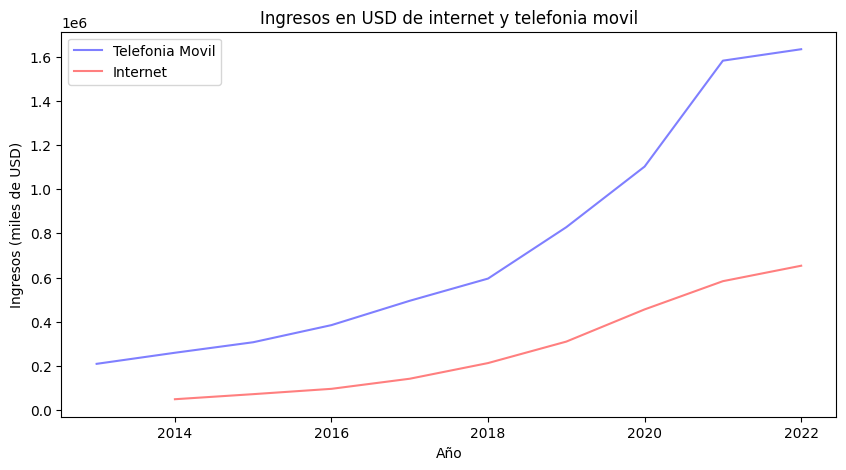

In [138]:
#Grafico de linea de ingresos en USD de internet y telefonia movil 
df_telefonia_movil_ingresos.groupby('Año')['Ingresos (miles de USD)'].sum().plot(kind='line', color='blue', alpha=0.5, figsize=(10,5))
df_internet_ingresos.groupby('Año')['Ingresos (miles de USD)'].sum().plot(kind='line', color='red', alpha=0.5, figsize=(10,5))
plt.title('Ingresos en USD de internet y telefonia movil')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de USD)')
plt.legend(['Telefonia Movil', 'Internet'])
plt.show()


## Analisis del gráfico de lineas: Ingresos en usd de Internet y Telefonia Movil
El grafico de lineas muestra la evolucion de los ingresos de internet y telefonia movil desde el 2014 al 2022. 
En el eje x se encuentra el año y en el eje y los ingresos en usd.
Se puede observar que los ingresos de telefonia movil son mayores a los de internet y que ambos van en aumento.

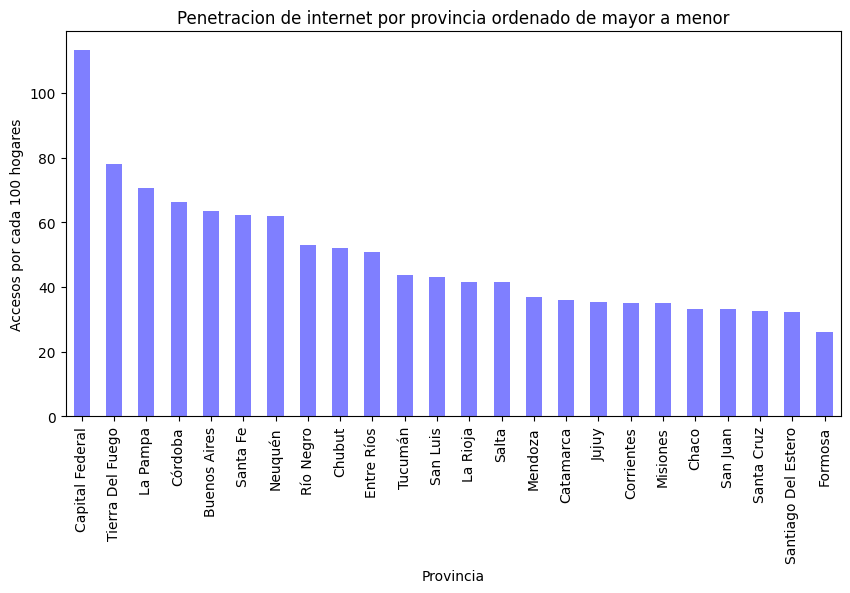

In [140]:
#Graficar penetracion de internet por provincia ordenado de mayor a menor 
df_internet_penetracion_provincia.groupby('Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.5, figsize=(10,5))
plt.title('Penetracion de internet por provincia ordenado de mayor a menor')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()


## Analisis del grafico de barras: Penetracion de internet por provincia
El grafico de barras muestra la penetracion de internet por provincia.
En el eje x se encuentra la provincia y en el eje y la penetracion de internet (acceso por cada 100 hogares).
Se puede observar que las provincia con mayor penetracion de internet son: Ciudad Autonoma de Buenos Aires, Tierra del Fuego, La Pampa, y Cordoba.
Las provincias con menor penetracion de internet son: Formosa, Santiago del Estero,Santa Cruz, San Juan.

In [141]:
df_pbipoblacion=pd.read_excel('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/PBI _PoblacionArg 2022.xlsx', sheet_name=0)


In [142]:
df_pbipoblacion.head()

,Provincia,Habitantes 2022,PBI 2022
0,Ciudad de Buenos Aires,3120612,119160.841629
1,Buenos Aires,17569053,300939.792392
2,Catamarca,429556,4487.389168
3,Córdoba,3978984,60988.128940
4,Corrientes,1197553,7802.397382


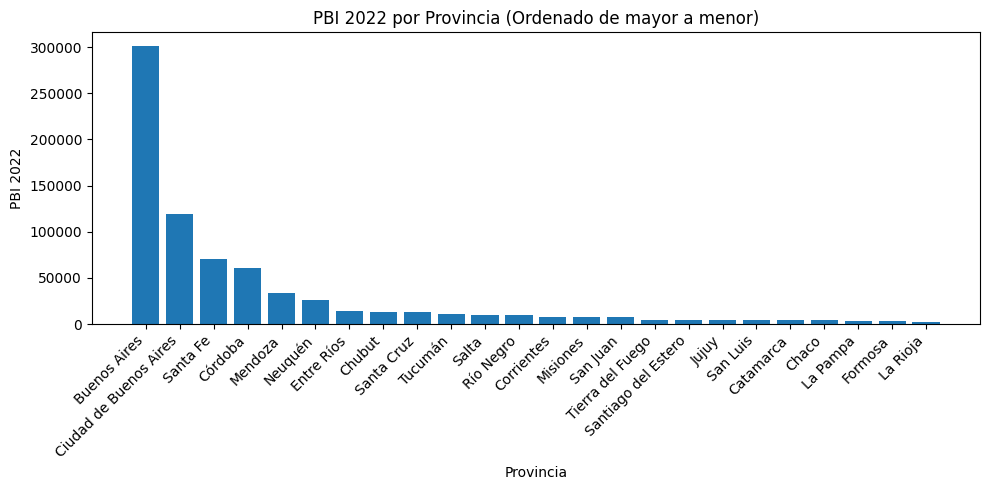

In [143]:
#Grafico poblacion por provincia

# Filtrar el DataFrame para excluir la fila de total
df_filtrado = df_pbipoblacion.loc[df_pbipoblacion['Provincia'] != 'Total']

# Ordenar el DataFrame por la columna "PBI 2022" de mayor a menor
df_ordenado = df_filtrado.sort_values('PBI 2022', ascending=False)

# Generar el gráfico de barras
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la figura para dar más espacio al eje x
plt.bar(df_ordenado['Provincia'], df_ordenado['PBI 2022'])
plt.xlabel('Provincia')
plt.ylabel('PBI 2022')
plt.title('PBI 2022 por Provincia (Ordenado de mayor a menor)')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x y las alinea a la derecha
plt.tight_layout()  # Ajusta automáticamente el espacio entre las barras y las etiquetas
plt.show()


## Analisis del grafico de barras: PBI 2022 por Provincia
El grafico de barras muestra el PBI 2022 por provincia.
En el eje x se encuentra la provincia y en el eje y el PBI 2022 en USD.
Se puede observar que las provincia con mayor PBI 2022 son: Buenos Aires, Ciudad Autonoma de Buenos Aires, Santa Fe, Cordoba, Mendoza.
Las provincias con menor PBI 2022 son: La Rioja, Formosa, La Pampa, Chaco.

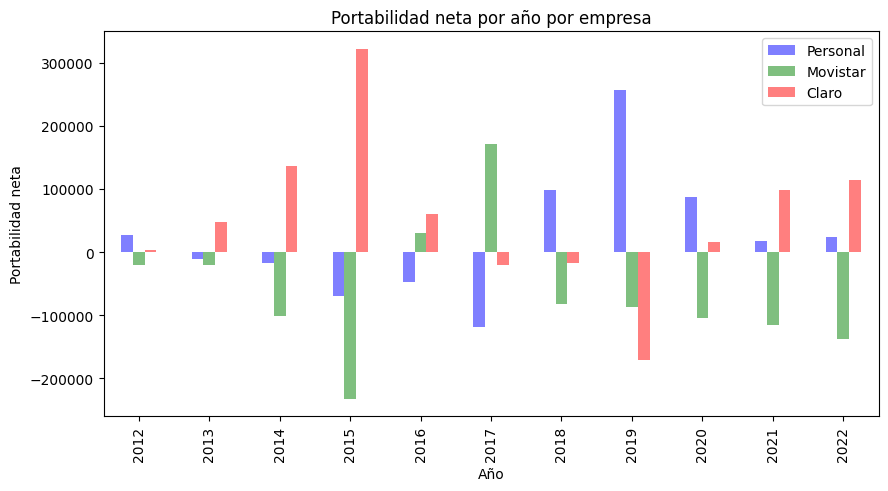

In [144]:
#Graficar portabilidad neta por año por empresa
df_portabilidad.groupby('Año')[['Personal','Movistar','Claro']].sum().plot(kind='bar', color=['blue','green','red'], alpha=0.5, figsize=(10,5))
plt.title('Portabilidad neta por año por empresa')
plt.xlabel('Año')
plt.ylabel('Portabilidad neta')
plt.show()


## Analisis del grafico de barras: Altas y Bajas de Movil por ano y empresa
El grafico de barras muestra las altas y bajas de movil por ano y empresa.
En el eje x se encuentra el ano y en el eje y la cantidad de altas y bajas, y por color se pueden observar las empresas.
Se puede osbervar una rotacion constante, siendo Movistar la empresa con mayor cantidad de bajas.


In [146]:
df_pbiporindustria=pd.read_excel('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/pbiporindustria.xlsx')


In [147]:
df_pbiporindustria.head()

,Industria/Sector,Participacion 2022 en pesos,Participacion 2022
0,Industria manufacturera,398415.163688,0.321333
1,"Comercio mayorista, minorista y reparaciones",135398.559942,0.109203
2,"Transporte, almacenamiento y comunicaciones",131288.174508,0.105887
3,"Actividades inmobiliarias, empresariales y de ...",112764.261660,0.090947
4,"Agricultura, ganadería, caza y silvicultura",98278.206406,0.079264


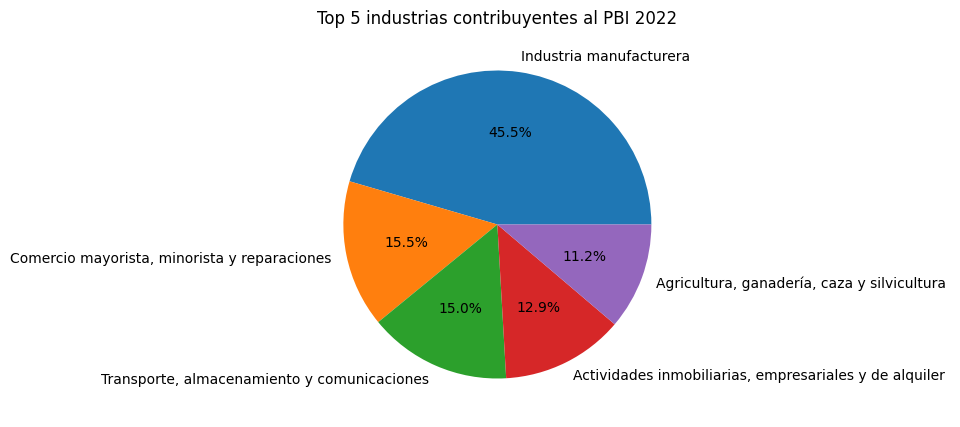

In [155]:
#Graficar pie Top 5 PBI por industria de mayor a menor
df_pbiporindustria.groupby('Industria/Sector')['Participacion 2022'].sum().sort_values(ascending=False).head().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
plt.title('Top 5 industrias contribuyentes al PBI 2022')
plt.ylabel('')
plt.show()

## Analisis grafico de torta: Top 5 industrias con mayor contribucion al PBI 2022
El grafico de torta muestra las 5 industrias con mayor contribucion al PBI 2022.
Se puede observar que las industrias con mayor contribucion son: Industria Manufacturera, Comercio, Transporte, Inmboliriaria, y el Agro. 

In [157]:
df_telcosmktshare=pd.read_excel('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/telcos mktshare.xlsx')

In [158]:
df_telcosmktshare.head()

,Operador,Marketshare
0,Claro,0.39
1,Personal,0.34
2,Movistar,0.27


## Analisis tabla: Marketshare de empresas de telecomunicaciones en Argentina
La tabla muestra el marketshare de las empresas de telecomunicaciones en Argentina.
Se puede observar que la empresa con mayor marketshare es Claro con 39%, seguida por Personal con 34%, y Movistar con 27%.

In [159]:
df_conectividadmundo=pd.read_excel('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/conectividadvsmundo.xlsx')

In [160]:
df_conectividadmundo.head()

,Distribución en 2021,Argentina,Argentina%,Mundo,Mundo%
0,Usuarios de Internet,"39,92 M",0.8715,"4,98 MM",0.6310
1,Usuarios banda ancha,"10,49 M",0.2290,"1,33 MM",0.1685
2,Teléfonos fijos,"7,63 M",0.1665,"889,29 M",0.1127
3,Teléfonos móviles,"59,07 M",1.2894,"8,48 MM",1.0750


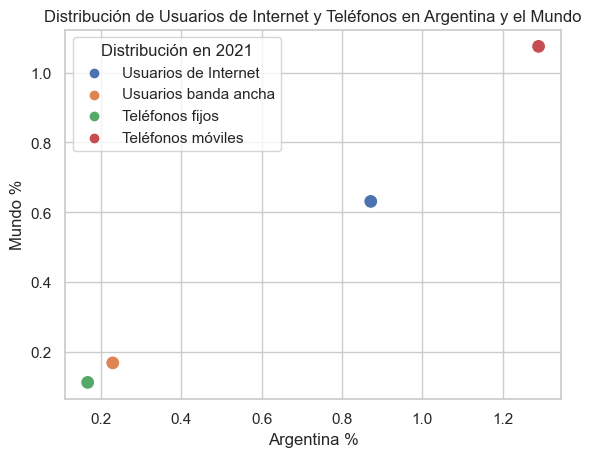

In [161]:
#Grafico de dispersion de conectividad vs mundo

sns.set(style='whitegrid')
sns.scatterplot(x='Argentina%', y='Mundo%', data=df_conectividadmundo, hue='Distribución en 2021', s=100)

plt.xlabel('Argentina %')
plt.ylabel('Mundo %')
plt.title('Distribución de Usuarios de Internet y Teléfonos en Argentina y el Mundo')

plt.show()


## Análisis del Gráfico de Dispersión: Distribución de Usuarios de Internet y Teléfonos en Argentina y el Mundo

El gráfico de dispersión muestra la distribución de usuarios de Internet y teléfonos en Argentina y en el mundo, representados por los porcentajes de participación para cada categoría en relación con el total.
En el eje x, se representa el porcentaje de participación de Argentina, mientras que en el eje y se muestra el porcentaje de participación del mundo. Cada punto en el gráfico representa una categoría de distribución en el año 2021, incluyendo usuarios de Internet, usuarios de banda ancha, teléfonos fijos y teléfonos móviles.
Estos resultados indican que Argentina tiene una mayor conectividad a Internet (87% vs 63%).

In [164]:
df_arpuchurn=pd.read_excel('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/arpuchurn.xlsx')


In [165]:
df_arpuchurn.head()

,Pais,Churn Rate,ARPU USD,Digital Mix
0,Argentina,0.05,5,0.1


In [166]:
df_iotdata_conexiones=pd.read_excel('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/iotdata.xlsx', sheet_name=0)
df_iotdata_latencia=pd.read_excel('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/iotdata.xlsx', sheet_name=1)
df_iotdata_breakdown=pd.read_excel('/Users/florencialuppi/Desktop/DS/P2/Dataset Telecomunicaciones/iotdata.xlsx', sheet_name=2)


In [167]:
df_iotdata_conexiones.head()

,Ano,IoT Conections
0,2010,99
1,2011,120
2,2012,200
3,2013,230
4,2014,250


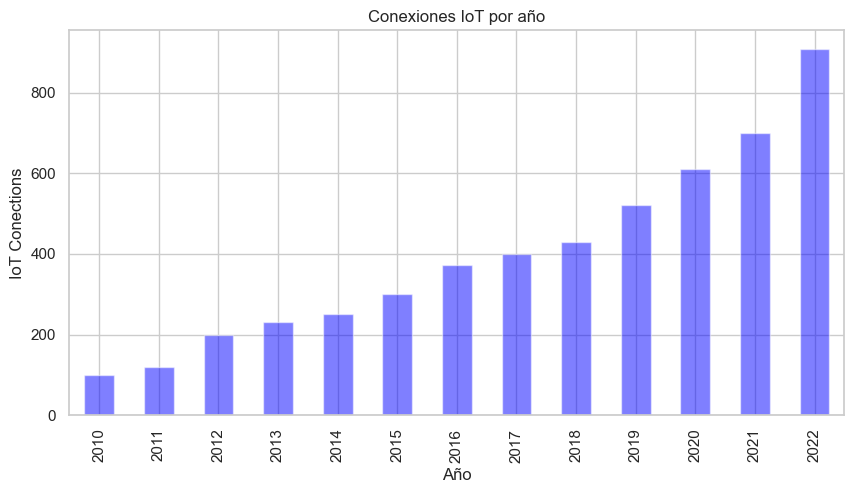

In [168]:
#Graficar conexiones IoT por año
df_iotdata_conexiones.groupby('Ano')['IoT Conections'].sum().plot(kind='bar', color='blue', alpha=0.5, figsize=(10,5))
plt.title('Conexiones IoT por año')
plt.xlabel('Año')
plt.ylabel('IoT Conections')
plt.show()

## Analisis del grafico de barras: Conexiones IoT por ano en Latinoamerica
El grafico de barras muestra las conexiones IoT por ano en Latinoamerica.
En el eje x se encuentra el ano y en el eje y la cantidad de conexiones IoT.
Se puede observar que las conexiones IoT van en aumento, siendo el 2022 el ano con mas de 900 millones de conexiones. 

In [169]:
df_iotdata_latencia.head()


,Provider,Median Download Speed,Median Multi-Server Latency
0,Personal,32.62,41
1,Claro,21.01,51
2,Movistar,15.18,56


## Analisis de tabla: Promedio velocidad de descarga y  promedio latencia por empresa
La tabla muestra el promedio de velocidad de descarga y el promedio de latencia por empresa.
Se puede observar que Personal es el que tiene mayor velocidad de descarga y menor latencia, seguido por Claro y Movistar.


In [170]:
df_iotdata_breakdown.head()

,Category,Revenue
0,Mobile,0.42
1,Internet,0.23
2,Other,0.23
3,Fixed,0.12


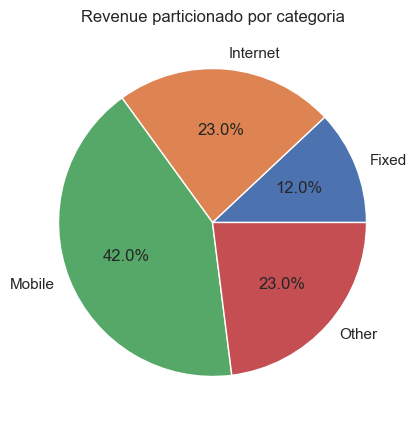

In [171]:
#graficar pie breakdown
df_iotdata_breakdown.groupby('Category')['Revenue'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
plt.title('Revenue particionado por categoria')
plt.ylabel('')
plt.show()


## Analisis grafico de torta: Revenue breakdown por tipo de servicio
El grafico de torta muestra el revenue breakdown por tipo de servicio.
Se puede observar que el mayor revenue es por servicios de Movil, Internet, Fija, y otros.